In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
              
 #parameters 
m_0 = 1.0                                          #m=sqrt(x**2+y**2+(z/q)**2)
n = 4.0                                            #concentration parameter that describes the curvature of the profile in a radius-magnitude plot, n=4 is de Vaucoileurs profile
r_0 = 1.4e-3                                          #characteristic radius (kpc)

 #integrate
f = lambda x: ((np.exp(-np.power(x/r_0, (1/n))))*(np.power(x/r_0, ((1/n)-1))))/(np.sqrt((x**2)-(m_0**2)));

I = quad(f, m_0, np.inf)

print(I)


(3.908165603798561e-05, 6.240357482872102e-10)


In [2]:
g = lambda m: quad(f, m, np.inf)[0]
print(g(10))

4.066583806080219e-08


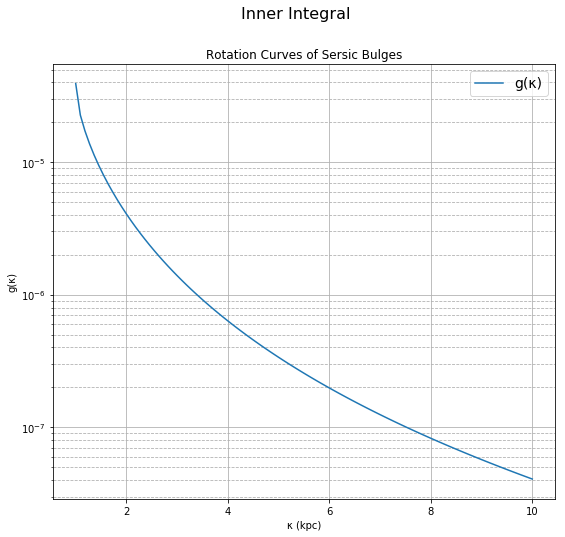

In [3]:
#adjusting the plot
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                        #x from/to and line smoothness
gv = np.vectorize(g)

 #functions
plt.plot(x, gv(x), linestyle='solid', label='g(\u03BA)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA (kpc)', ylabel='g(\u03BA)');

plt.legend(fontsize=14);                                      #adding legend

In [4]:
 #parameters
I_0 = 1.08e8                                        #central surface brightness (20 mag/arcsec^2 = 1.08e3 cd/km^2)
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)
ups = 2.8                                           #mass-to-light ratio (from Rotation Curves of Sersic Bulges paper)
q = 0.33                                            #intrinsic axis ratio
i = 40*(np.pi/180)                                  #inclination angle

#equations
C = (4*G*q*ups*I_0)/(r_0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)
x = np.linspace(10, 8000, 80)

h = lambda m,r: C*g(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))
#l = lambda r: quad(h, 1, r)[0]
y = np.zeros(np.shape(x))
print(y)
for j,r in enumerate(x):
    hr = lambda m: h(m,r)
    yr = quad(hr, 1, r)[0]
    y[j] = yr
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


[7.49328274 0.90591809 0.47138954 0.31843291 0.24046029 0.19318386
 0.16145305 0.13868031 0.12154006 0.10817203 0.09745401 0.088669
 0.08133721 0.07512547 0.06979534 0.06517151 0.06112242 0.05754699
 0.05436681 0.05151974 0.04895604 0.04663539 0.04452483 0.04259703
 0.04082928 0.03920238 0.03770016 0.03630884 0.03501658 0.03381313
 0.03268964 0.03163844 0.03065272 0.02972658 0.02885475 0.02803262
 0.02725603 0.02652131 0.02582517 0.02516462 0.02453705 0.02394
 0.02337131 0.02282903 0.02231133 0.0218166  0.02134333 0.02089015
 0.02045583 0.02003919 0.01963919 0.01925485 0.01888525 0.01852959
 0.01818706 0.01785698 0.01753866 0.01723149 0.0169349  0.01664832
 0.0163713  0.01610337 0.01584405 0.01559295 0.01534968 0.01511389
 0.01488523 0.01466338 0.01444806 0.01423896 0.01403583 0.01383842
 0.01364648 0.01345979 0.01327814 0.01310133 0.01292917 0.01276147
 0.01259806 0.01243879]


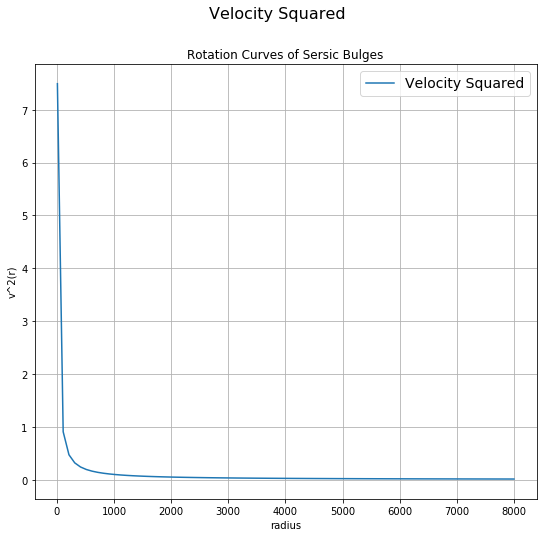

In [5]:
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax2 = plt.axes()
ax2.grid(True)
ax2.yaxis.grid(True,which='minor',linestyle='--')

#x = np.linspace(1, 10, 100)                    #x from/to and line smoothness
#lv = np.vectorize(l)

 #functions
#plt.plot(x, lv(x), linestyle='solid', label='Velocity Squared')          
plt.plot(x, y, linestyle='solid', label='Velocity Squared')

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Velocity Squared', fontsize=16)
ax2.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax2.set(xlabel='radius', ylabel='v^2(r)');

plt.legend(fontsize=14);                                   #adding legend
plt.show()

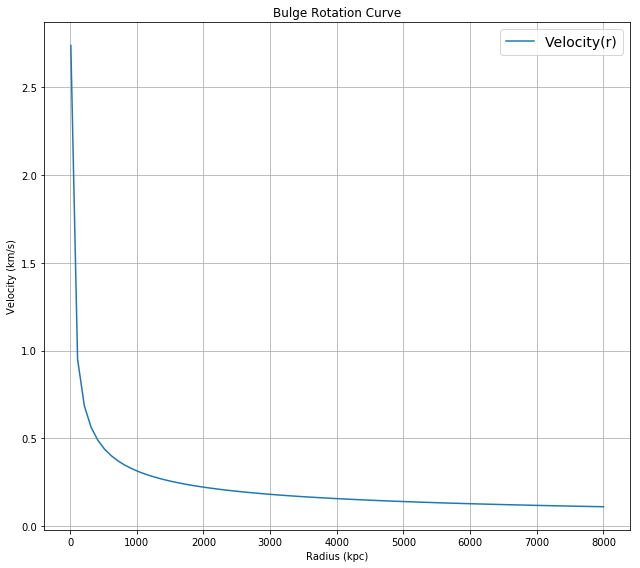

In [6]:
v = np.sqrt(y)

fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')


 #functions
plt.plot(x, v, linestyle='solid', label='Velocity(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
ax3.set(title='Bulge Rotation Curve')              #labeling axes
ax3.set(xlabel='Radius (kpc)', ylabel='Velocity (km/s)');

plt.legend(fontsize=14);                                   #adding legend
plt.tight_layout()
plt.savefig('Bulge_Rotation_Curve.png')
plt.show()